In [52]:
from Bio import SeqIO
import pandas as pd
import re
import os

In [53]:
#Set working directory so that everything can be called uniformly
os.chdir('/Users/Andi')
print(os.getcwd())

/Users/Andi


In [54]:
#call in all current Orthomcl IDs matched with Gene names.
orth_caurisdf = pd.read_csv('Desktop/funpath/DB/orth_uniprot/cauris_og6orth_uniprot.tsv', sep='\t')
orth_chaedf = pd.read_csv('Desktop/funpath/DB/orth_uniprot/chae_og6orth_uniprot.tsv', sep='\t')
orth_calbicansdf = pd.read_csv('Desktop/funpath/DB/orth_uniprot/calbicans_og6orth_uniprot.tsv', sep='\t')
orth_sceredf= pd.read_csv('Desktop/funpath/DB/orth_uniprot/scere_og6orth_uniprot.tsv', sep='\t')

In [55]:
orth_calbicansdf

,Accession,Entry
0,OG6r21_119614,Q5AB58
1,OG6r21_119615,Q5AB59
2,OG6_115022,A0A1D8PC38
3,OG6_108387,P0CY34
4,OG6_102327,A0A1D8PC43
...,...,...
6025,OG6_102452,A0A1D8PUC1
6026,OG6_123089,A0A1D8PUC5
6027,OG6_100349,A0A1D8PUB4
6028,OG6_101225,A0A1D8PUD2


In [56]:
value_counts_auris = orth_caurisdf['Accession'].value_counts()
duplicates_auris = value_counts_auris[value_counts_auris > 1]
print(f"Number of OGs that are duplicated in auris: {len(duplicates_auris)}")

Number of OGs that are duplicated in auris: 509


In [57]:
value_counts_hae = orth_chaedf['Accession'].value_counts()
duplicates_hae = value_counts_hae[value_counts_hae > 1]
print(f"Number of OGs that are duplicated in haemulonii: {len(duplicates_hae)}")

Number of OGs that are duplicated in haemulonii: 513


In [58]:
value_counts_albicans = orth_calbicansdf['Accession'].value_counts()
duplicates_albicans = value_counts_albicans[value_counts_albicans > 1]
print(f"Number of OGs that are duplicated in albicans: {len(duplicates_albicans)}")

Number of OGs that are duplicated in albicans: 593


In [59]:
value_counts_scere = orth_sceredf['Accession'].value_counts()
duplicates_scere = value_counts_scere[value_counts_scere > 1]
print(f"Number of OGs that are duplicated in cerevisiae: {len(duplicates_scere)}")

Number of OGs that are duplicated in cerevisiae: 711


In [60]:
auris2= orth_caurisdf['Accession'].tolist()
albicans1= orth_calbicansdf['Accession'].tolist()
haemulonii4= orth_chaedf['Accession'].tolist()
scere3= orth_sceredf['Accession'].tolist()

In [61]:
set_auris = set(auris2)
set_albicans = set(albicans1)
set_haemulonii = set(haemulonii4)
set_scere = set(scere3)

In [62]:
print(len(set_auris))

4654


In [63]:
# Convert all elements in your sets to strings
set_auris2 = {str(i) for i in set_auris}
set_albicans1 = {str(i) for i in set_albicans}
set_haemulonii4 = {str(i) for i in set_haemulonii}
set_scere3 = {str(i) for i in set_scere}

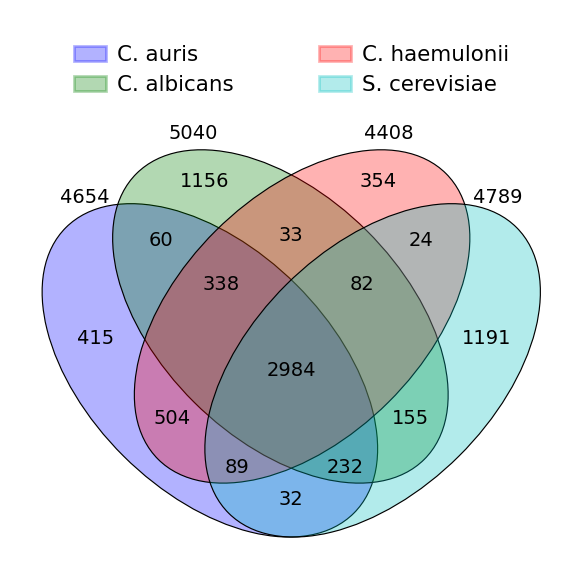

In [64]:

from venny4py.venny4py import *

sets = {
    'C. auris': set_auris2,
    'C. albicans': set_albicans1,
    'C. haemulonii': set_haemulonii4,
    'S. cerevisiae': set_scere3
}
venny4py(sets=sets)
plt.savefig("4way_venn.pdf")

In [9]:
#compare C.Scere and C.Auris
Scere_v_Auris_common_hits = set(scere3) & set(auris2)
Scere_v_Auris_num_common_hits = len(Scere_v_Auris_common_hits)
Scere_v_Auris_not_common_hits_scere3 = (set(scere3)) - Scere_v_Auris_common_hits
Scere_v_Auris_not_common_hits_auris2 = (set(auris2)) - Scere_v_Auris_common_hits

#print("Auris v Scere (Scere) Not common hits:",len(Scere_v_Auris_not_common_hits_scere3), list(Scere_v_Auris_not_common_hits_scere3))
#print("Auris v Scere (Auris) Not common hits:",len(Scere_v_Auris_not_common_hits_auris2), list(Scere_v_Auris_not_common_hits_auris2))
#print("Auris v Scere (Auris) Not common hits:",len(Scere_v_Auris_not_common_hits_auris2))

print("Scere_v_Auris Number of common hits:", Scere_v_Auris_num_common_hits)
#print("Scere_v_Auris Common hits:", list(Scere_v_Auris_common_hits))

Scere_v_Auris Number of common hits: 2880


In [46]:
#compare C.Albicans and C.Auris
Albicans_v_Auris_common_hits = set(albicans1) & set(auris2)
Albicans_v_Auris_num_common_hits = len(Albicans_v_Auris_common_hits)
Albicans_v_Auris_not_common_hits_albicans1 = (set(albicans1)) - Albicans_v_Auris_common_hits
Albicans_v_Auris_not_common_hits_auris2 = (set(auris2)) - Albicans_v_Auris_common_hits

#print("Auris v Albicans (Albicans) Not common hits:",len(Albicans_v_Auris_not_common_hits_albicans1), list(Albicans_v_Auris_not_common_hits_albicans1))
#print("Auris v Albicans (Auris) Not common hits:",len(Albicans_v_Auris_not_common_hits_auris2), list(Albicans_v_Auris_not_common_hits_auris2))
#print("Auris v Albicans (Auris) Not common hits:",len(Albicans_v_Auris_not_common_hits_auris2))

print("Albicans_v_Auris Number of common hits:", Albicans_v_Auris_num_common_hits)
#print("Albicans_v_Auris Common hits:", list(Albicans_v_Auris_common_hits))


Albicans_v_Auris Number of common hits: 3840


In [47]:
#compare C.Haemulonii and C.Auris
Haemulonii_v_Auris_common_hits = set(haemulonii4) & set(auris2)
Haemulonii_v_Auris_num_common_hits = len(Haemulonii_v_Auris_common_hits)
Haemulonii_v_Auris_not_common_hits_haemulonii4 = (set(haemulonii4)) - Haemulonii_v_Auris_common_hits
Haemulonii_v_Auris_not_common_hits_auris2 = (set(auris2)) - Haemulonii_v_Auris_common_hits

#print("Auris v Haemulonii (Haemulonii) Not common hits:",len(not_common_hits_haemulonii4), list(not_common_hits_haemulonii4))
#print("Auris v Haemulonii (Auris) Not common hits:",len(not_common_hits_auris2), list(not_common_hits_auris2))
#print("Auris v Haemulonii (Auris) Not common hits:",len(Haemulonii_v_Auris_not_common_hits_auris2))

print("Haemulonii_v_Auris Number of common hits:", Haemulonii_v_Auris_num_common_hits)
#print("Haemulonii_v_Auris Common hits:", list(Haemulonii_v_Auris_common_hits))

Haemulonii_v_Auris Number of common hits: 3915


In [48]:
#compare C.Albicans and C.Haemulonii

Albicans_v_Haemulonii_common_hits = set(albicans1) & set(haemulonii4)
Albicans_v_Haemulonii_num_common_hits = len(Albicans_v_Haemulonii_common_hits)
Albicans_v_Haemulonii_not_common_hits_albicans1 = (set(albicans1)) - Albicans_v_Haemulonii_common_hits
Albicans_v_Haemulonii_not_common_hits_haemulonii4 = (set(haemulonii4)) - Albicans_v_Haemulonii_common_hits

#print("Haemulonii v Albicans (Albicans) Not common hits:",len(Albicans_v_Haemulonii_not_common_hits_albicans1), list(Albicans_v_Haemulonii_not_common_hits_albicans1))
#print("Haemulonii v Albicans (Haemulonii) Not common hits:",len(Albicans_v_Haemulonii_not_common_hits_haemulonii4), list(Albicans_v_Haemulonii_not_common_hits_haemulonii4))
#print("Haemulonii v Albicans (Haemulonii) Not common hits:",len(Albicans_v_Haemulonii_not_common_hits_haemulonii4))

print("Albicans_v_Haemulonii Number of common hits:", Albicans_v_Haemulonii_num_common_hits)
#print("Albicans_v_Haemulonii Common hits:", list(Albicans_v_Haemulonii_common_hits))


Albicans_v_Haemulonii Number of common hits: 3658


In [49]:
### compare C.Scere and C.Haemulonii

Scere_v_Haemulonii_common_hits = set(scere3) & set(haemulonii4)
Scere_v_Haemulonii_num_common_hits = len(Scere_v_Haemulonii_common_hits)
Scere_v_Haemulonii_not_common_hits_scere3 = (set(scere3)) - Scere_v_Haemulonii_common_hits
Scere_v_Haemulonii_not_common_hits_haemulonii4 = (set(haemulonii4)) - Scere_v_Haemulonii_common_hits

#print("Haemulonii v Scere (Scere) Not common hits:",len(Scere_v_Haemulonii_not_common_hits_scere3), list(Scere_v_Haemulonii_not_common_hits_scere3))
#print("Haemulonii v Scere (Haemulonii) Not common hits:",len(Scere_v_Haemulonii_not_common_hits_haemulonii4), list(Scere_v_Haemulonii_not_common_hits_haemulonii4))
#print("Haemulonii v Scere (Haemulonii) Not common hits:",len(Scere_v_Haemulonii_not_common_hits_haemulonii4))

print("Scere_v_Haemulonii Number of common hits:", Scere_v_Haemulonii_num_common_hits)
#print("Scere_v_Haemulonii Common hits:", list(Scere_v_Haemulonii_common_hits))


Scere_v_Haemulonii Number of common hits: 3179


In [50]:
#compare not common hits for auris v (cerevisiae+albicans+haemulonii)
Auris_v_albicanshaemulonii = set(Albicans_v_Auris_not_common_hits_auris2)& set(Haemulonii_v_Auris_not_common_hits_auris2)
print("not common hits for auris v (albicans+haemulonii):", len(Auris_v_albicanshaemulonii))
print("not common hits for auris v (albicans+haemulonii):", list(Auris_v_albicanshaemulonii))

not common hits for auris v (albicans+haemulonii): 410
not common hits for auris v (albicans+haemulonii): ['OG6_158931', 'OG6_146692', 'OG6r20_119421', 'OG6_102308', 'OG6_105613', 'OG6_499893', 'OG6_114109', 'OG6r20_115388', 'OG6r20_115422', 'OG6_113999', 'OG6_120624', 'OG6_107572', 'OG6r20_109166', 'OG6_152834', 'OG6_131049', 'OG6_500425', 'OG6r20_115239', 'OG6r20_126674', 'OG6r20_105288', 'OG6_105899', 'OG6r20_106978', 'OG6_500110', 'OG6r20_106963', 'OG6r20_106132', 'OG6r20_139748', 'OG6r20_102797', 'OG6r20_110728', 'OG6r20_106972', 'OG6_133088', 'OG6r20_115413', 'OG6r20_119418', 'OG6r20_102801', 'OG6_133483', 'OG6r20_115399', 'OG6r20_115427', 'OG6_110008', 'OG6_500920', 'OG6r20_105112', 'OG6r20_115423', 'OG6_107719', 'OG6_551097', 'OG6r20_119439', 'OG6r20_106129', 'OG6_105449', 'OG6r20_106953', 'OG6_456230', 'OG6r20_110729', 'OG6_129432', 'OG6_108563', 'OG6_143826', 'OG6_129940', 'OG6_186596', 'OG6_578689', 'OG6_120008', 'OG6r20_119429', 'OG6r20_115431', 'OG6_104680', 'OG6r20_126669

In [51]:
#compare not common hits for albicans v (auris+haemulonii)
Albicans_v_aurishaemulonii = set(Albicans_v_Auris_not_common_hits_albicans1)& set(Albicans_v_Haemulonii_not_common_hits_albicans1)
print("not common hits for auris v (albicans+haemulonii):", len(Albicans_v_aurishaemulonii))
print("not common hits for auris v (albicans+haemulonii):", list(Albicans_v_aurishaemulonii))

not common hits for auris v (albicans+haemulonii): 1155
not common hits for auris v (albicans+haemulonii): ['OG6r20_292363', 'OG6r20_112548', 'OG6r20_112535', 'OG6r20_139497', 'OG6_124787', 'OG6_153075', 'OG6r20_139548', 'OG6_500894', 'OG6r20_126539', 'OG6r20_139695', 'OG6r20_139631', 'OG6r20_119411', 'OG6r20_292310', 'OG6r20_139597', 'OG6r20_292324', 'OG6r20_139558', 'OG6r20_102006', 'OG6_103682', 'OG6_133440', 'OG6r20_115343', 'OG6_108809', 'OG6r20_139484', 'OG6r20_292359', 'OG6r20_139512', 'OG6r20_139706', 'OG6r20_115342', 'OG6r20_106116', 'OG6r20_292365', 'OG6r20_112555', 'OG6r20_126538', 'OG6_110307', 'OG6r20_292328', 'OG6r20_115315', 'OG6r20_107963', 'OG6r20_139494', 'OG6r20_166880', 'OG6_104219', 'OG6r20_126584', 'OG6r20_112571', 'OG6r20_292369', 'OG6r20_292317', 'OG6_129913', 'OG6r20_107956', 'OG6r20_103082', 'OG6r20_139729', 'OG6r20_126632', 'OG6_129996', 'OG6_130544', 'OG6r20_115350', 'OG6_114707', 'OG6r20_106098', 'OG6r20_292400', 'OG6r20_292348', 'OG6r20_139569', 'OG6_20789

In [52]:
#compare not common hits for haemulonii v (auris+albicans)
Haemulonii_v_aurisalbicans = set(Albicans_v_Haemulonii_not_common_hits_haemulonii4)& set(Haemulonii_v_Auris_not_common_hits_haemulonii4)
print("not common hits for haemulonii v (auris+albicans):", len(Haemulonii_v_aurisalbicans))
print("not common hits for haemulonii v (auris+albicans):", list(Haemulonii_v_aurisalbicans))

not common hits for haemulonii v (auris+albicans): 346
not common hits for haemulonii v (auris+albicans): ['OG6_166201', 'OG6r20_309485', 'OG6_206401', 'OG6_356208', 'OG6r20_309474', 'OG6_321938', 'OG6r20_309467', 'OG6_500446', 'OG6r20_106241', 'OG6r20_140411', 'OG6_104198', 'OG6_104698', 'OG6r20_169550', 'OG6r20_140427', 'OG6r20_169539', 'OG6_111876', 'OG6_353691', 'OG6r20_309496', 'OG6_108401', 'OG6r20_169544', 'OG6_206525', 'OG6r20_309510', 'OG6_133439', 'OG6_130353', 'OG6_204757', 'OG6r20_309507', 'OG6r20_309505', 'OG6r20_140412', 'OG6_359353', 'OG6r20_127071', 'OG6r20_309520', 'OG6_168648', 'OG6r20_309458', 'OG6r20_110736', 'OG6_515067', 'OG6_500836', 'OG6_118658', 'OG6r20_309461', 'OG6_106823', 'OG6_155145', 'OG6r20_139741', 'OG6_115878', 'OG6r20_112015', 'OG6r20_140425', 'OG6r20_169542', 'OG6_111340', 'OG6_451884', 'OG6r20_140775', 'OG6r20_140409', 'OG6_102280', 'OG6_140331', 'OG6_451084', 'OG6_153334', 'OG6r20_309466', 'OG6_114961', 'OG6_143853', 'OG6r20_169540', 'OG6r20_309504

In [53]:
#compare common hits all (auris+albicans+haemulonii)
Auris_v_albicans_v_haemulonii = set(Albicans_v_Auris_common_hits)& set(Haemulonii_v_Auris_common_hits)& set(Haemulonii_v_Auris_common_hits)
print("common hits for auris v albicans v haemulonii:", len(Auris_v_albicans_v_haemulonii))
print("common hits for auris v albicans v haemulonii:", list(Auris_v_albicans_v_haemulonii))

common hits for auris v albicans v haemulonii: 3511
common hits for auris v albicans v haemulonii: ['OG6_101165', 'OG6_100364', 'OG6_101589', 'OG6_101847', 'OG6_101603', 'OG6_100595', 'OG6_222561', 'OG6_111253', 'OG6_101211', 'OG6_115041', 'OG6_103853', 'OG6_110526', 'OG6_101285', 'OG6_108387', 'OG6_102075', 'OG6_500046', 'OG6_105184', 'OG6_106731', 'OG6_101881', 'OG6_118307', 'OG6_101193', 'OG6_101309', 'OG6_100714', 'OG6_103854', 'OG6_100819', 'OG6_101190', 'OG6_102120', 'OG6_104071', 'OG6_102872', 'OG6_101063', 'OG6_101070', 'OG6_100144', 'OG6_106143', 'OG6_112414', 'OG6_103712', 'OG6_110822', 'OG6_500269', 'OG6r20_101107', 'OG6_103525', 'OG6_105785', 'OG6_105385', 'OG6_102037', 'OG6_101526', 'OG6_101133', 'OG6_116884', 'OG6_100460', 'OG6_100794', 'OG6_101974', 'OG6_104339', 'OG6_103673', 'OG6_101386', 'OG6_500743', 'OG6_123104', 'OG6_102180', 'OG6r20_102499', 'OG6_100742', 'OG6_104710', 'OG6_100903', 'OG6r20_101801', 'OG6_112766', 'OG6_102949', 'OG6_101788', 'OG6_101540', 'OG6r20_1

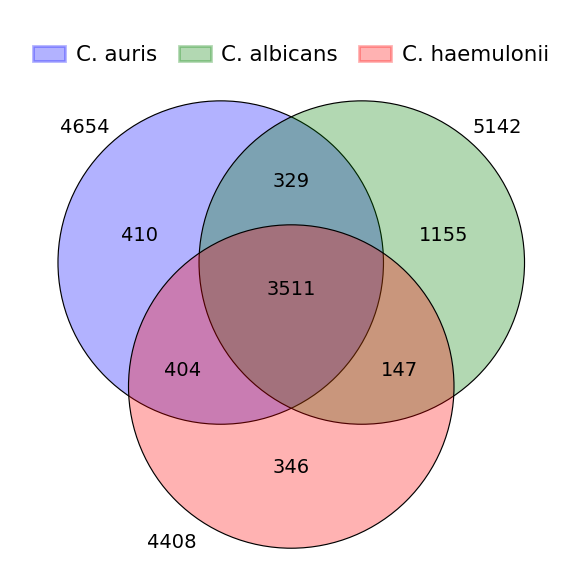

In [41]:
from venny4py.venny4py import *
import matplotlib.pyplot as plt

sets = {
    'C. auris': set_auris2,
    'C. albicans': set_albicans1,
    'C. haemulonii': set_haemulonii4
}

venny4py(sets=sets)
plt.savefig("3way_venn.pdf")

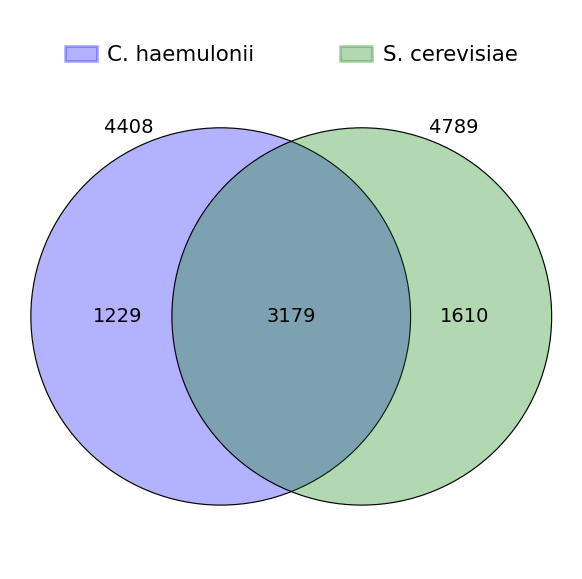

In [64]:
from venny4py.venny4py import *
import matplotlib.pyplot as plt

sets = {
    'C. haemulonii': set_haemulonii4,
    'S. cerevisiae': set_scere3
}

venny4py(sets=sets)
plt.savefig("2way_venn_albcere.pdf")

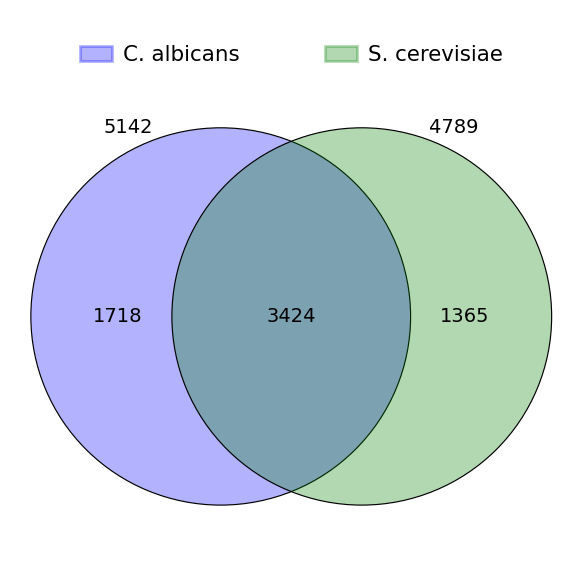

In [63]:
from venny4py.venny4py import *
import matplotlib.pyplot as plt

sets = {
    'C. albicans': set_albicans1,
    'S. cerevisiae': set_scere3
}

venny4py(sets=sets)
plt.savefig("2way_venn_albcere.pdf")

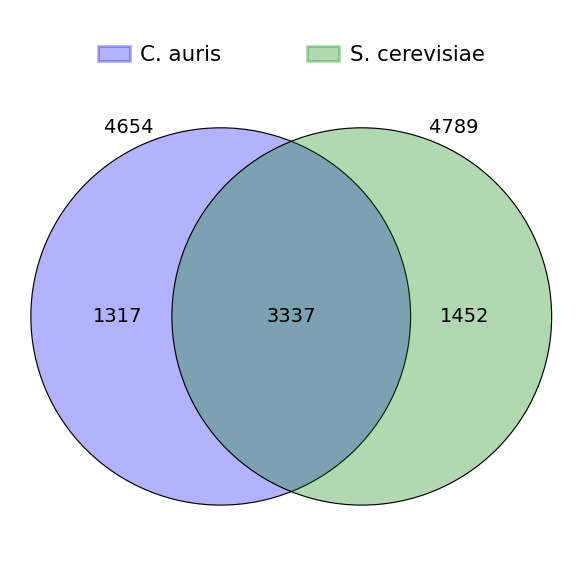

In [57]:
from venny4py.venny4py import *
import matplotlib.pyplot as plt

sets = {
    'C. auris': set_auris2,
    'S. cerevisiae': set_scere3
}
venny4py(sets=sets)
plt.savefig("2way_venn_auriscere.pdf")

#### takes a dictionary and a list of keys as inputs, and returns a list of values corresponding to the matching keys
def get_matching_values(dictionary, keys):
    matching_values = []
    for key in keys:
        if key in dictionary:
            matching_values.append(dictionary[key])
    return matching_values



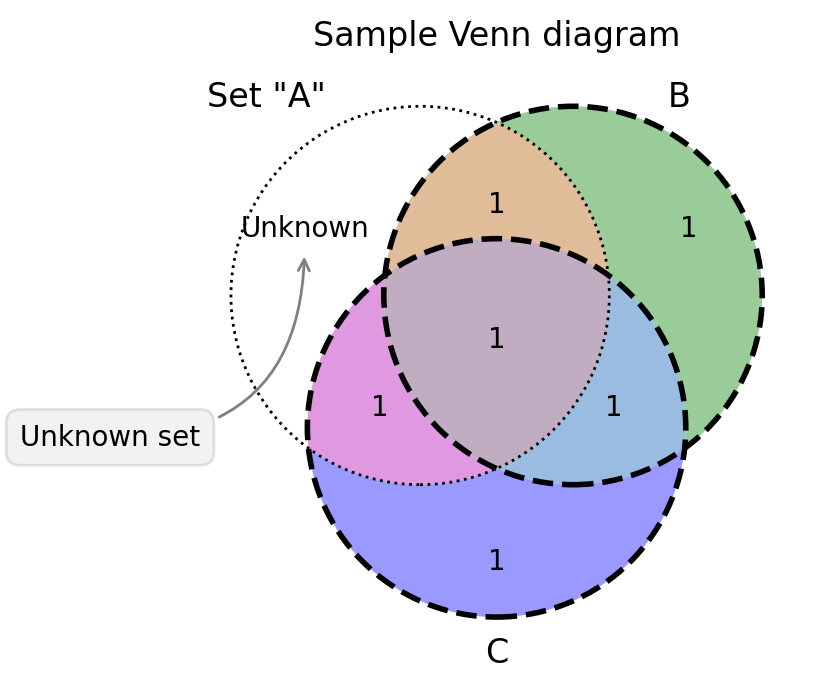

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles, venn2
plt.figure(figsize=(4,4))
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
plt.title("Candida OG Comparison")
plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()



In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles

# Define the subsets for the 4-way Venn diagram
subsets = (1, 1, 1, 1, 1, 1, 1)

# Create the 4-way Venn diagram
plt.figure(figsize=(6,6))
v = venn4(subsets=subsets, set_labels=('A', 'B', 'C', 'D'))

# Set the properties for the 'Unknown' subset
v.get_patch_by_id('1000').set_alpha(1.0)
v.get_patch_by_id('1000').set_color('white')
v.get_label_by_id('1000').set_text('Unknown')

# Set the labels for each set
v.get_label_by_id('A').set_text('Set "A"')
v.get_label_by_id('B').set_text('Set "B"')
v.get_label_by_id('C').set_text('Set "C"')
v.get_label_by_id('D').set_text('Set "D"')

# Create circles for the Venn diagram
c = venn4_circles(subsets=subsets, linestyle='dashed')

# Set properties for the circles
c[0].set_lw(1.0)
c[0].set_ls('dotted')

# Add a title to the plot
plt.title("4-Way Venn Diagram")

# Add annotation for the 'Unknown' set
plt.annotate('Unknown set', xy=v.get_label_by_id('1000').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))


ImportError: cannot import name 'venn4' from 'matplotlib_venn' (/Users/Andi/anaconda3/lib/python3.10/site-packages/matplotlib_venn/__init__.py)

In [ ]:
all_only = len(Auris_v_albicans_v_haemulonii)
auris_albicans_only = len(Albicans_v_Auris_common_hits) - all_only
auris_haemulonii_only = len(Haemulonii_v_Auris_common_hits) - all_only
haemulonii_albicans_only = len(Haemulonii_v_Auris_common_hits) - all_only
auris_only = len(Auris_v_albicanshaemulonii)
albicans_only = len(Albicans_v_aurishaemulonii)
haemulonii_only = len(Haemulonii_v_aurisalbicans)
venn3(subsets = (haemulonii_only, auris_only, auris_haemulonii_only, albicans_only, haemulonii_albicans_only, auris_albicans_only, all_only), set_labels = ('Haemulonii', 'Auris', 'Albicans'))
plt.savefig("4way_venn.pdf")


In [ ]:
#takes a list and extracts the 4th-14th characters of each element, storing them in a separate list:
def extract_characters(lst):
    extracted_list = []
    for item in lst:
        if len(item) >= 14:
            extracted_list.append(item[3:13])
    return extracted_list


In [ ]:
original_list = matching_keys
result_list = extract_characters(original_list)
print(result_list)

In [ ]:
import csv

def filter_csv(source_file, output_file, match_list):
    matched_rows = []

    with open(source_file, 'r') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)  # Read the header row

        for row in reader:
            for item in row:
                if item in match_list:
                    matched_rows.append(row)
                    break

    matched_rows.sort()  # Sort the matched rows alphabetically

    with open(output_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(header)
        writer.writerows(matched_rows)


In [17]:
import pandas as pd
df = pd.read_csv("~/Desktop/fungi/Cauris_tmpfile_hmmrscan-Copy1.csv", delim_whitespace=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Andi/Desktop/fungi/Cauris_tmpfile_hmmrscan-Copy1.csv'

In [ ]:
df

In [18]:
#extracts specific columns from a DataFrame and creates a new DataFrame with those columns
def extract_columns(df):
    new_df = df.iloc[:, [0,3, 6, 7]]  # Extracting columns 

    return new_df

extractedcolumn_df = extract_columns(df)

NameError: name 'df' is not defined

In [19]:
extractedcolumn_df.head()

NameError: name 'extractedcolumn_df' is not defined

In [20]:
#extracts the 5th through 14th characters from every row in the second column of a DataFrame and replaces the second column with the extracted values:
def extract_characters(df):
    extracted_values = df.iloc[:, 1].str[3:13]  # Extract characters 4th-14th for the second column
   

    extracted_df = df.copy()  # Create a copy of the original DataFrame
    extracted_df.iloc[:, 1] = extracted_values  # Replace the second column with the extracted values
   
    return extracted_df



In [21]:

extracted_df = extract_characters(extractedcolumn_df)

extracted_df.head()

NameError: name 'extractedcolumn_df' is not defined

In [22]:
import numpy as np

def filter_dataframe(df, value_list):
    filtered_df = df[df.iloc[:, 1].isin(value_list)]
    df['compare'] = 0
   
    # Take the logarithm of the 3rd column values
    df.iloc[:, 2] = np.log(df.iloc[:, 2])
    
    
    
    

 

    return filtered_df



In [23]:

filtered_df = filter_dataframe(extracted_df, result_list)
print(filtered_df)

NameError: name 'extracted_df' is not defined

In [24]:
def compare_lists(df, list1, list2):
    

    for index, row in df.iterrows():
        value = row['target_name']

        if value in list1 and value in list2:
            df.at[index, 'compare'] = 3
        elif value in list1:
            df.at[index, 'compare'] = 1
        elif value in list2:
            df.at[index, 'compare'] = 2

    return df

In [25]:
compare_lists(filtered_df, calbicans1_keys_last5, chaemulonii4_keys_last5)

NameError: name 'filtered_df' is not defined

In [45]:

import seaborn as sns
import matplotlib.pyplot as plt

def create_stripplots_score(df):
    unique_instances = df.iloc[:, 1].unique()  # Get unique instances from the 2nd column

    # Convert the 5th column to numeric data type
    df.iloc[:, 3] = pd.to_numeric(df.iloc[:, 3], errors='coerce')

    color_mapping = {0: 'black', 1: 'red', 2: 'blue', 3: 'purple'}

    for instance in unique_instances:
        sns.set(style="whitegrid")
        subset_df = df[df.iloc[:, 1] == instance]  # Filter DataFrame for the current instance

        # Take the top 10 values based on the 5th column
        subset_df = subset_df.nlargest(10, subset_df.columns[3])

        plt.figure()  # Create a new figure for each strip plot

        # Create the strip plot using the 5th column values as y-axis and the 1st column values as x-axis
        ax = sns.stripplot(data=subset_df, x=subset_df.iloc[:, 0], y=subset_df.iloc[:, 3])

        plt.ylim(0,)  # Set the y-axis limits to 0 
        plt.xlabel('Eggnog Orthogolous Group')
        plt.ylabel('Hmmr Score')
        plt.title(f'Strip Plot for Instance: {instance}')

        # Rotate the x-axis labels by 90 degrees
        plt.xticks(rotation=90)

        # Set the text colors in the first column based on the values in the 5th column
        labels = subset_df.iloc[:, 0].tolist()
        for tick_label, color_value in zip(ax.get_xticklabels(), subset_df.iloc[:, 4]):
            tick_label.set_color(color_mapping.get(color_value))

        plt.tight_layout()
        plt.show()

/var/folders/rw/tfs5pfbx2zg_q39nh65tbfrw0000gp/T/ipykernel_49344/3486168766.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, 3] = pd.to_numeric(df.iloc[:, 3], errors='coerce')
/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname YM identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname YM identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-awa

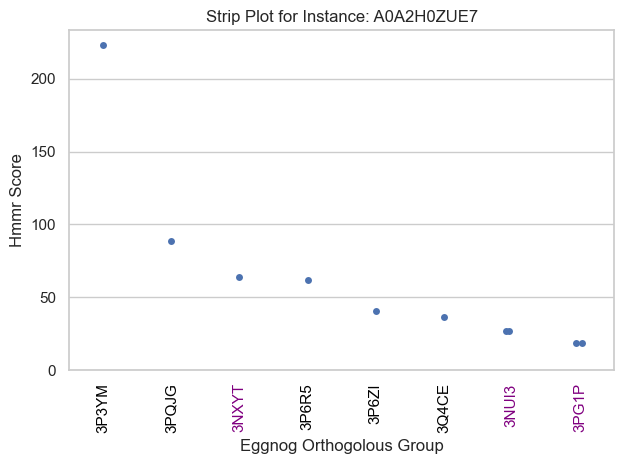

/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CA identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CA identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


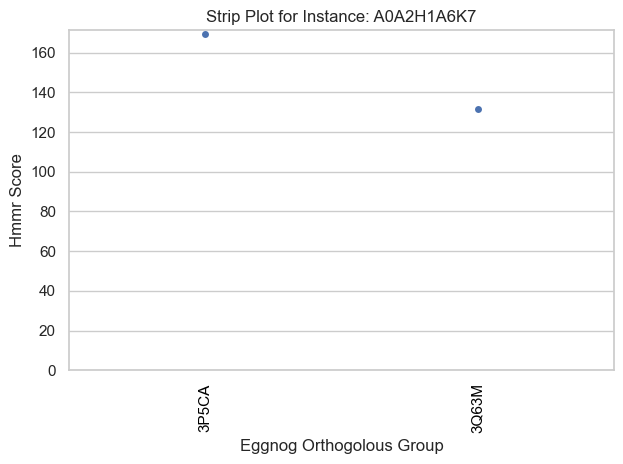

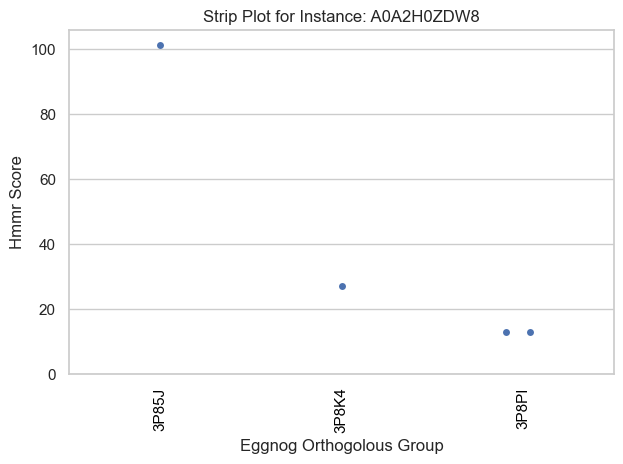

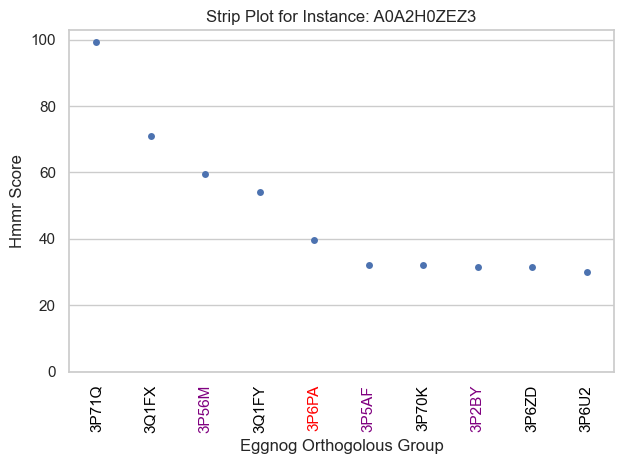

/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PD identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname ZB identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PD identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzn

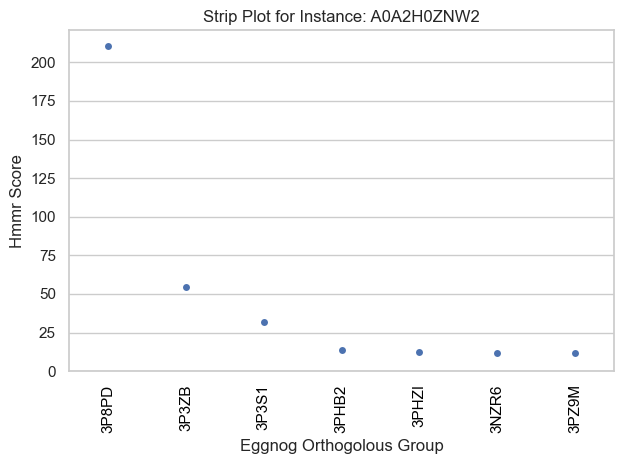

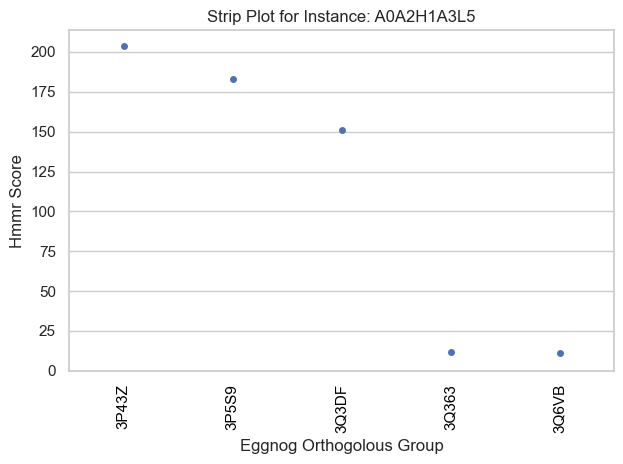

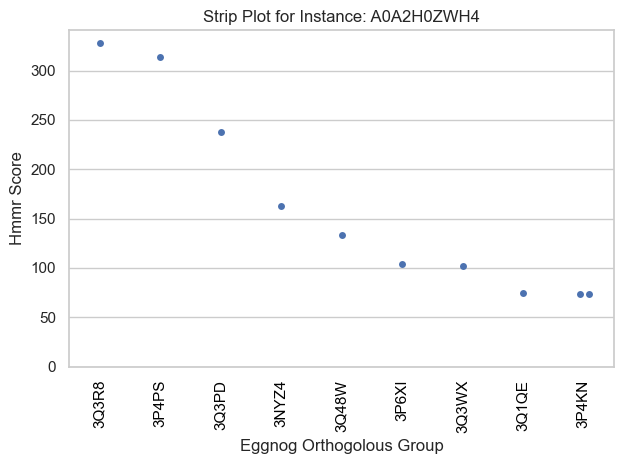

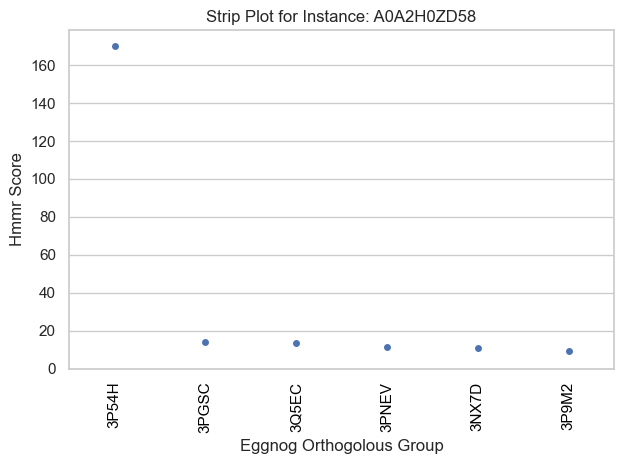

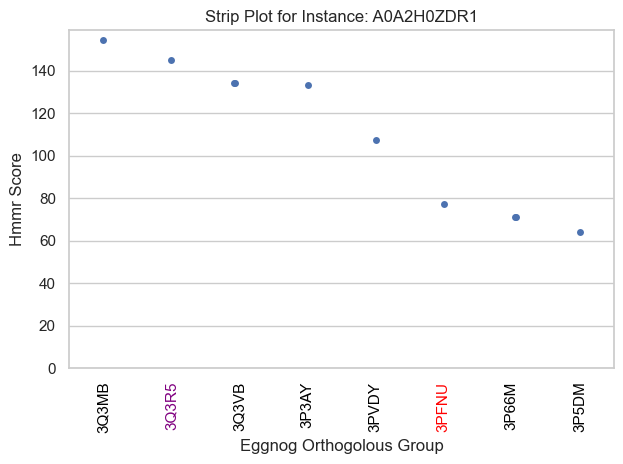

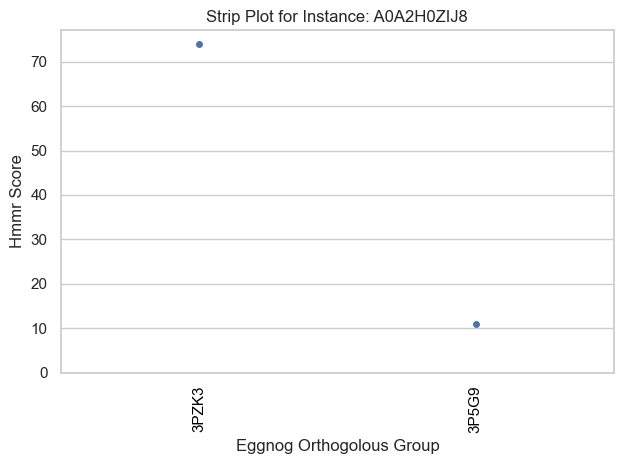

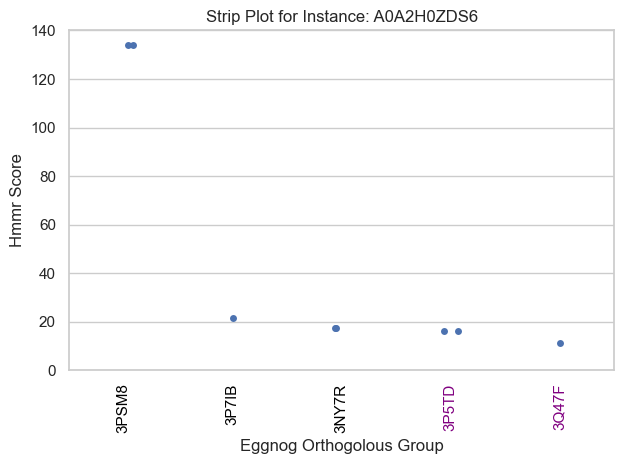

/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname HW identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname BM identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname HW identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzn

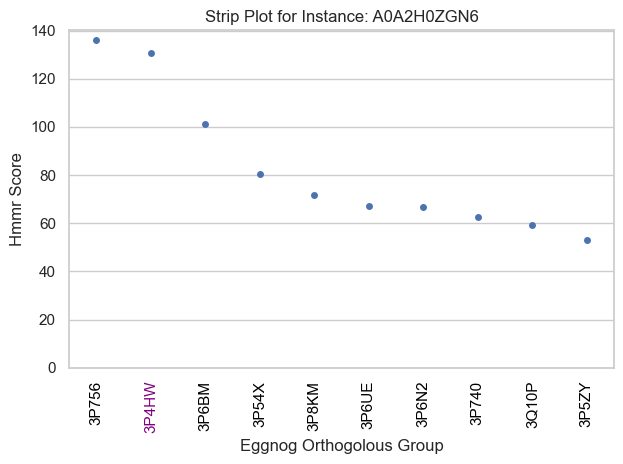

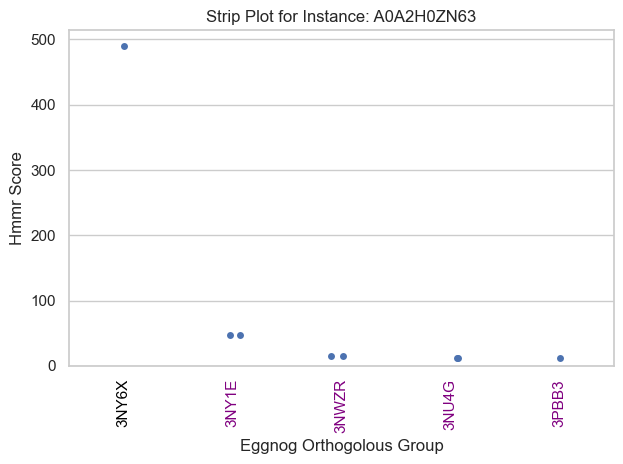

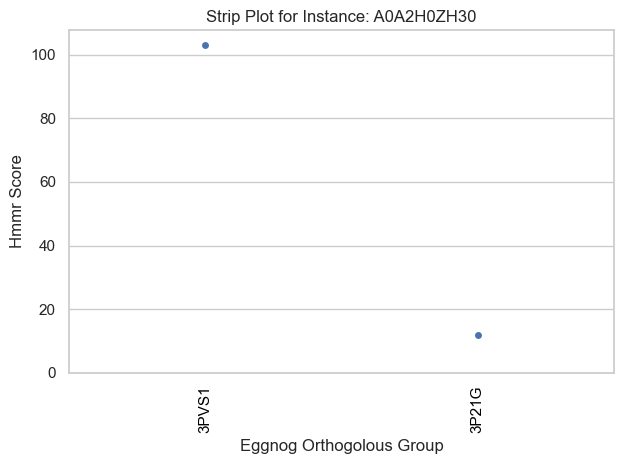

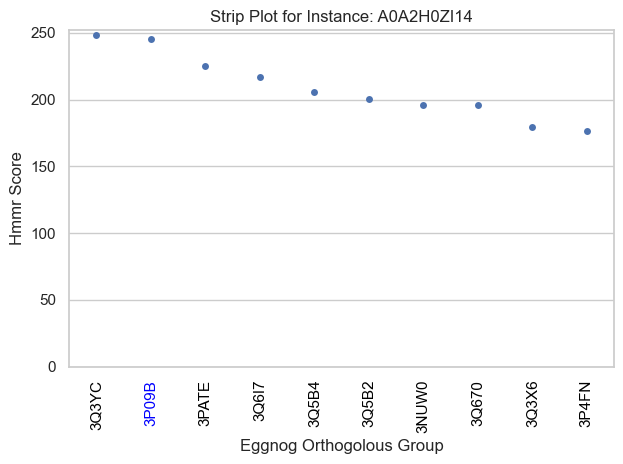

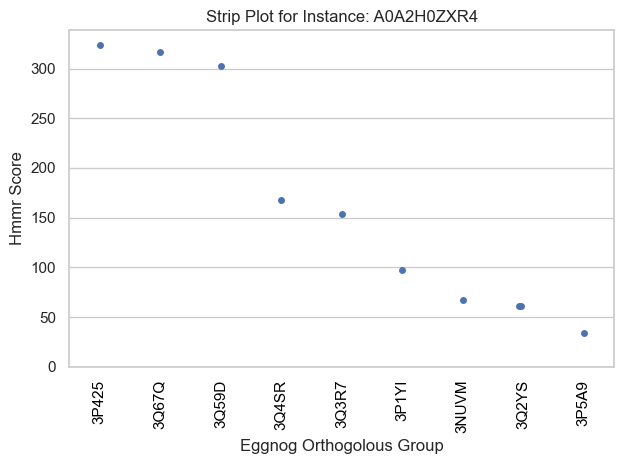

/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname MZ identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname MZ identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


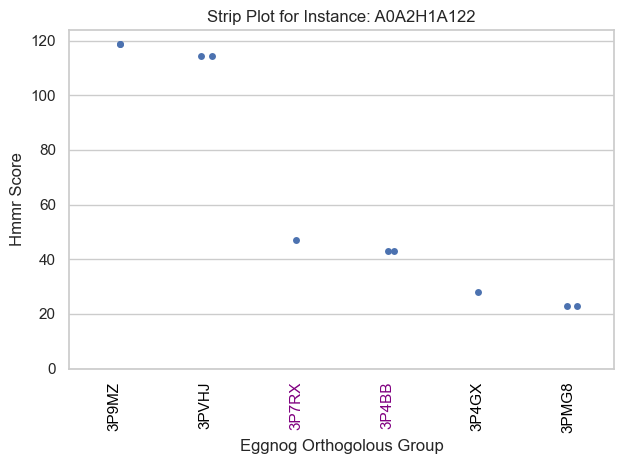

In [46]:

create_stripplots_score(filtered_df)

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_stripplots_evalue(df):
    unique_instances = df.iloc[:, 1].unique()  # Get unique instances from the 2nd column

    # Convert the 5th column to numeric data type
    df.iloc[:, 3] = pd.to_numeric(df.iloc[:, 3], errors='coerce')

    color_mapping = {0: 'black', 1: 'red', 2: 'blue', 3: 'purple'}

    for instance in unique_instances:
        sns.set(style="whitegrid")
        subset_df = df[df.iloc[:, 1] == instance]  # Filter DataFrame for the current instance

        # Take the top 10 values based on the 5th column
        subset_df = subset_df.nsmallest(10, subset_df.columns[2])

        plt.figure()  # Create a new figure for each strip plot

        # Create the strip plot using the 5th column values as y-axis and the 1st column values as x-axis
        ax = sns.stripplot(data=subset_df, x=subset_df.iloc[:, 0], y=subset_df.iloc[:, 2])

       
        plt.xlabel('Eggnog Orthogolous Group')
        plt.ylabel('Log E-Value')
        plt.title(f'Strip Plot for Instance: {instance}')

        # Rotate the x-axis labels by 90 degrees
        plt.xticks(rotation=90)

        # Set the text colors in the first column based on the values in the 5th column
        labels = subset_df.iloc[:, 0].tolist()
        for tick_label, color_value in zip(ax.get_xticklabels(), subset_df.iloc[:, 4]):
            tick_label.set_color(color_mapping.get(color_value))

        plt.tight_layout()
        plt.show()

/var/folders/rw/tfs5pfbx2zg_q39nh65tbfrw0000gp/T/ipykernel_84876/1916643219.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, 3] = pd.to_numeric(df.iloc[:, 3], errors='coerce')
/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname YM identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname YM identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-awa

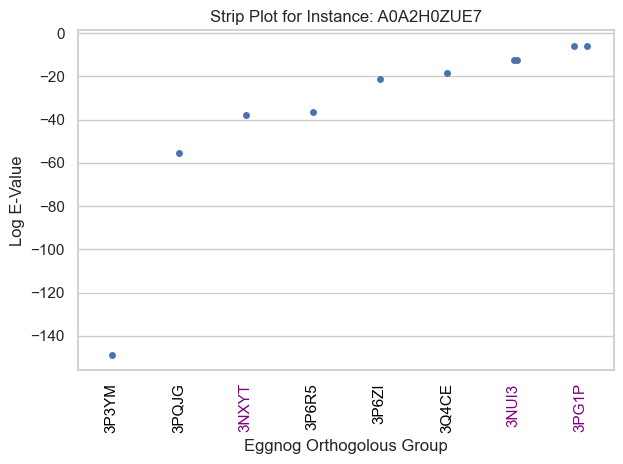

/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CA identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CA identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


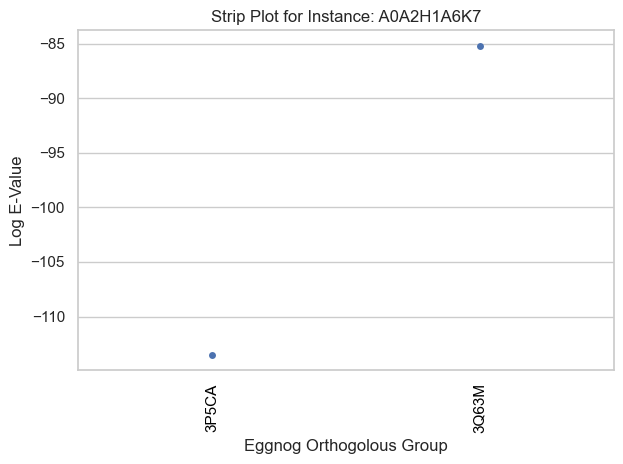

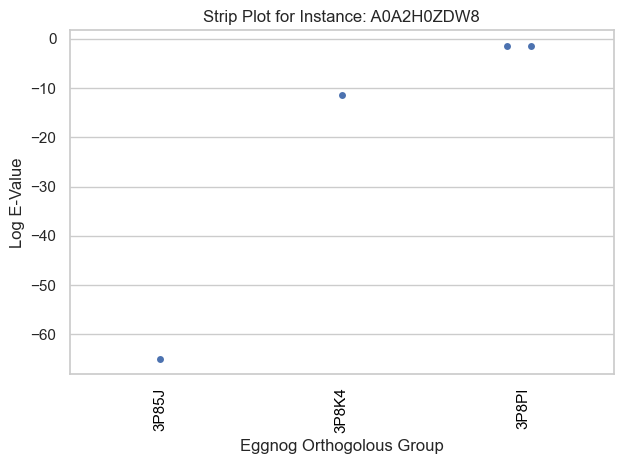

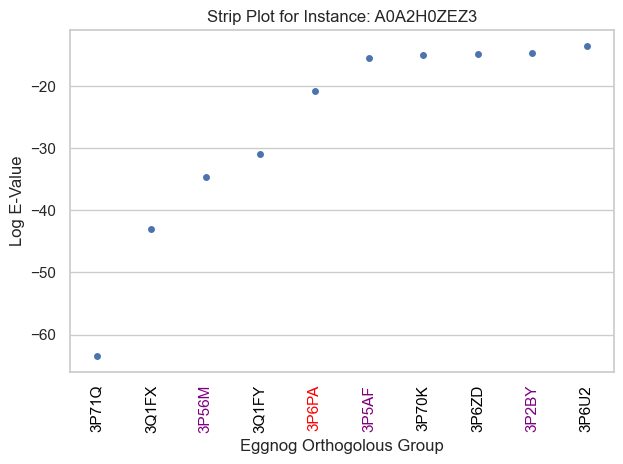

/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PD identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname ZB identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PD identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzn

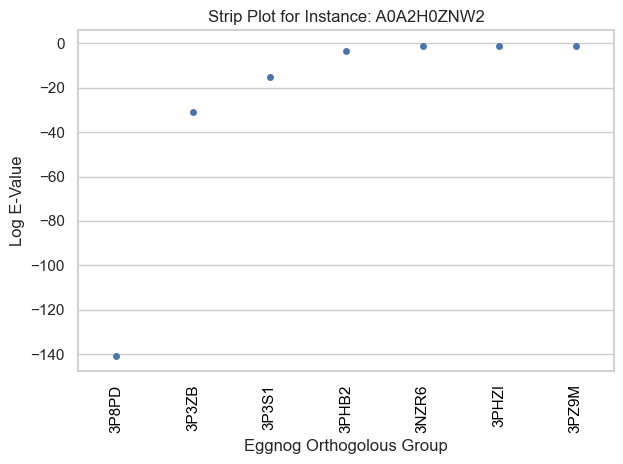

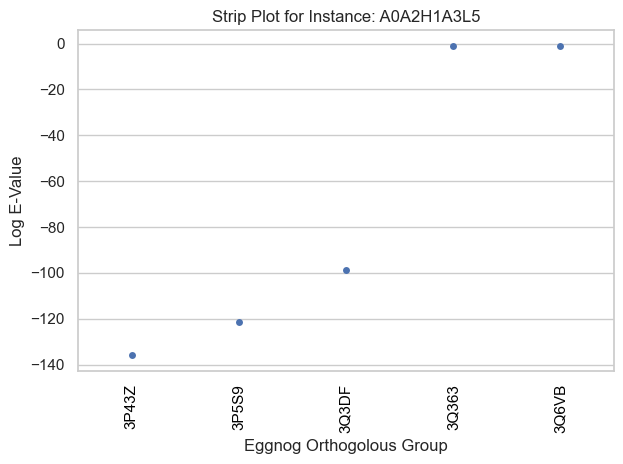

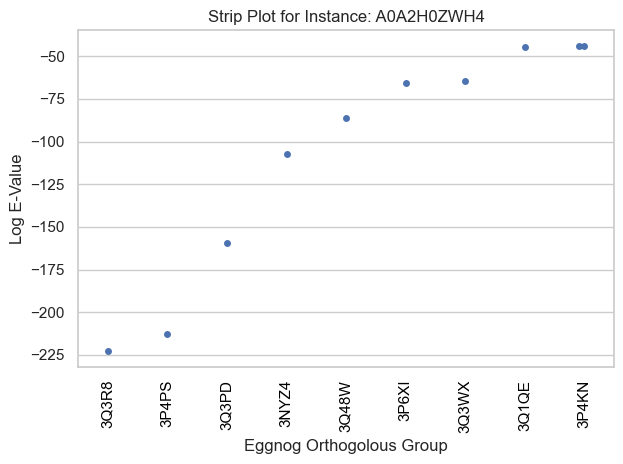

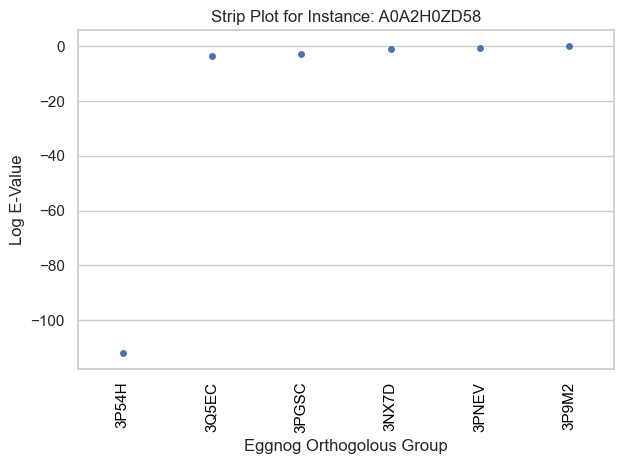

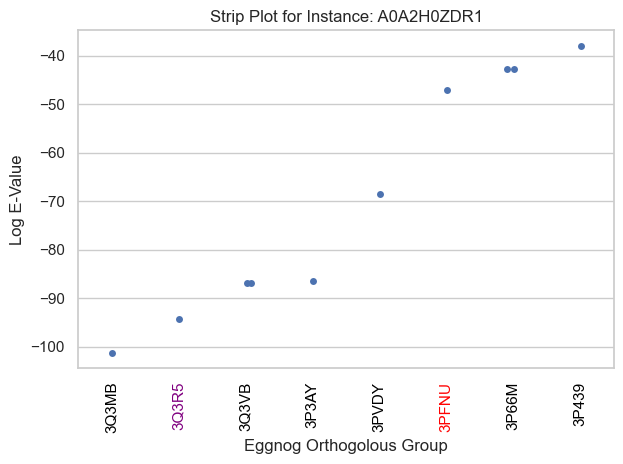

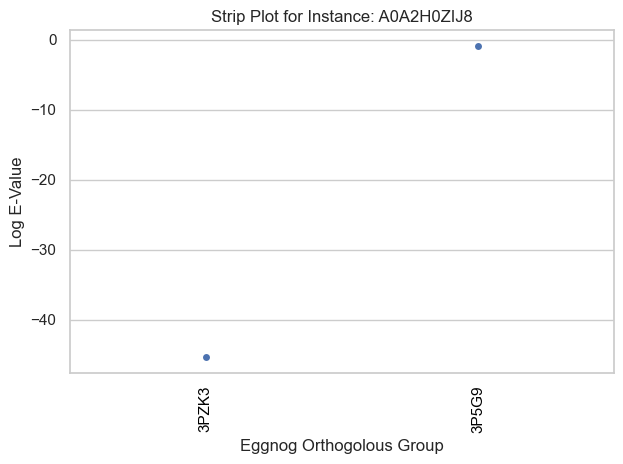

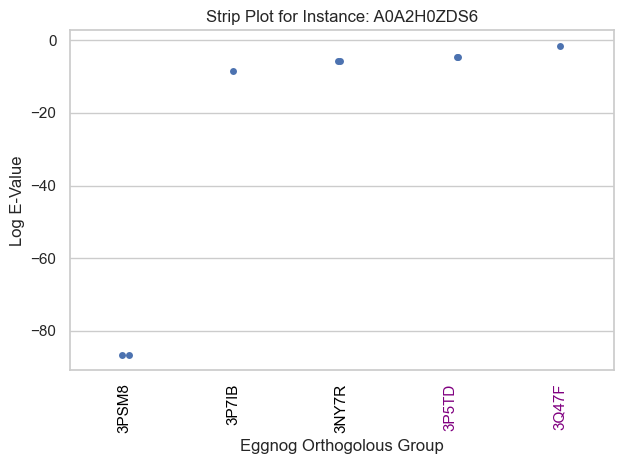

/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname HW identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname BM identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname HW identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzn

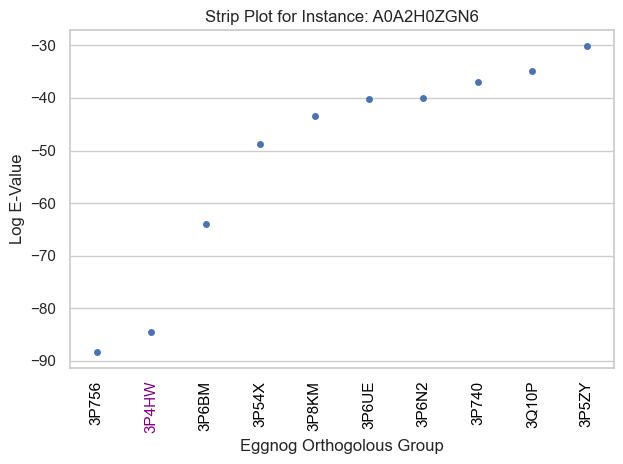

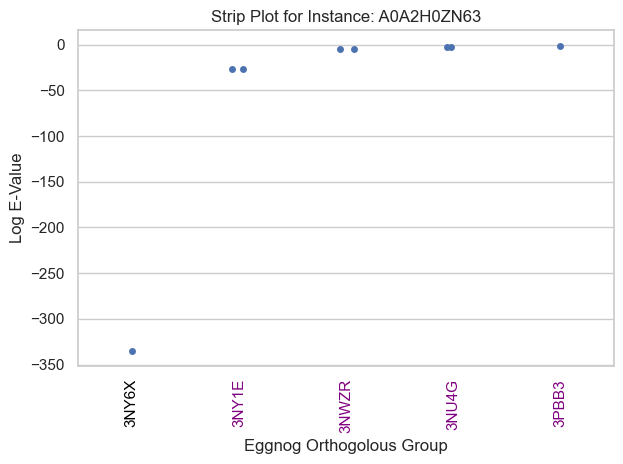

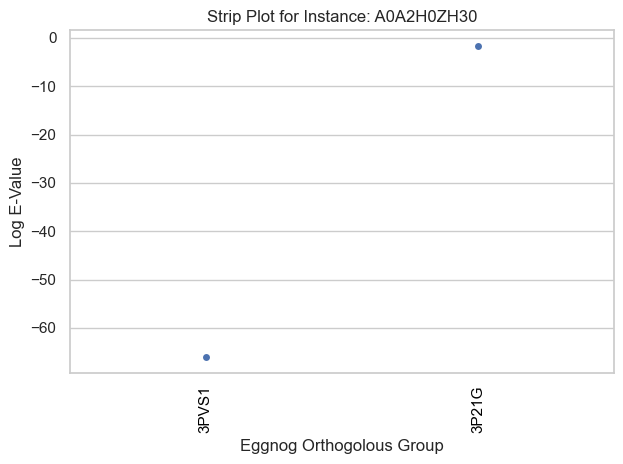

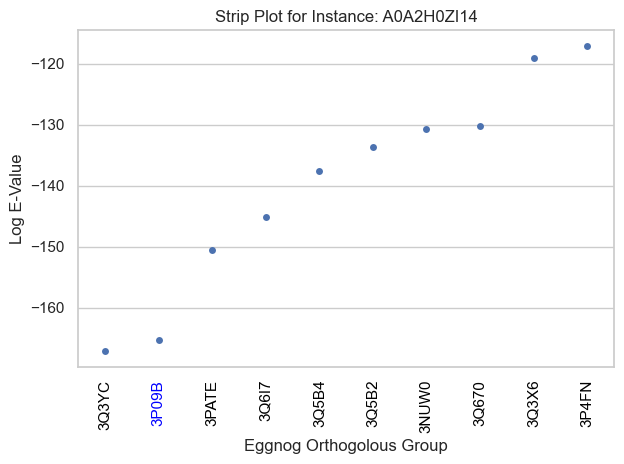

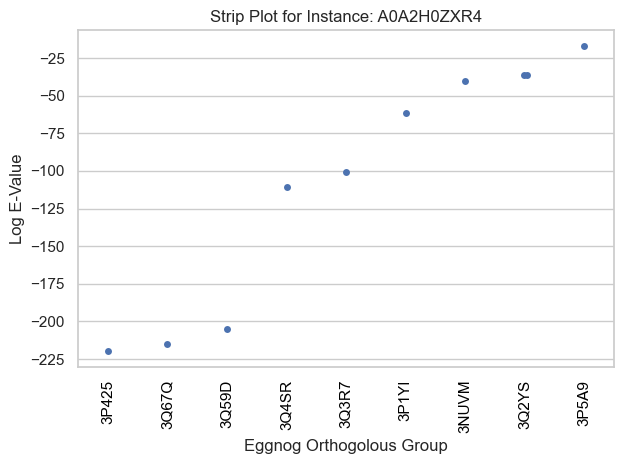

/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname MZ identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/Andi/anaconda3/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname MZ identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


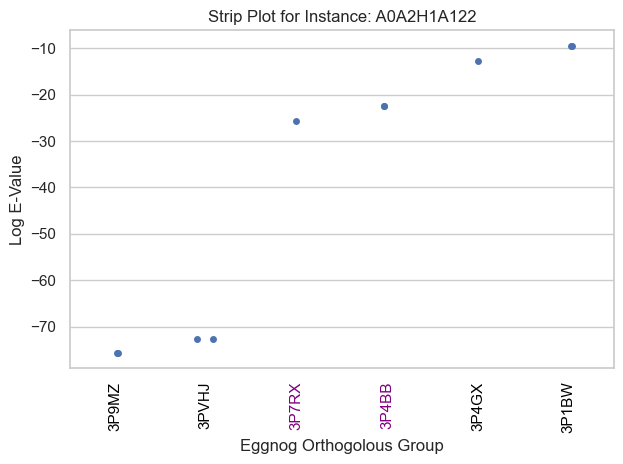

In [42]:
create_stripplots_evalue(filtered_df)